In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Enhanced_Labor_Outcome_Dataset[1].csv')


In [3]:
df.head()

,Maternal Age,Gestational Age (weeks),Cervical Dilatation (cm),Contraction Frequency (min),Fetal Heart Rate (bpm),Amniotic Fluid Condition,Pain Location,Show Present (Y/N),Bag of Waters (Y/N),Parity (Primigravida/Multigravida),Previous Pregnancy Complications,Labor Stage,Analgesia Used (Y/N),Risk Level,Labor Duration Estimation,Outcome (Binary)
0,35.0,29.0,1.0,17.0,176.0,Blood-stained,Groin,Y,N,Primigravida,N,Second,Y,High,0.058824,0
1,39.0,41.0,7.2,11.0,118.0,Clear,Groin,Y,N,Primigravida,Y,Fourth,N,High,0.476471,0
2,23.0,38.0,8.4,17.0,172.0,Clear,Groin,N,Y,Primigravida,N,Third,Y,Low,0.494118,1
3,26.0,38.0,7.8,2.0,121.0,Blood-stained,Abdomen,Y,Y,Multigravida,N,Third,N,Low,3.900000,1
4,34.0,31.0,3.2,3.0,162.0,Blood-stained,Groin,Y,N,Multigravida,N,Third,Y,High,1.066667,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Maternal Age                        150000 non-null  float64
 1   Gestational Age (weeks)             150000 non-null  float64
 2   Cervical Dilatation (cm)            150000 non-null  float64
 3   Contraction Frequency (min)         150000 non-null  float64
 4   Fetal Heart Rate (bpm)              150000 non-null  float64
 5   Amniotic Fluid Condition            150000 non-null  object 
 6   Pain Location                       150000 non-null  object 
 7   Show Present (Y/N)                  150000 non-null  object 
 8   Bag of Waters (Y/N)                 150000 non-null  object 
 9   Parity (Primigravida/Multigravida)  150000 non-null  object 
 10  Previous Pregnancy Complications    150000 non-null  object 
 11  Labor Stage               

In [5]:
def summary(df):
    table_info=pd.DataFrame(df.dtypes,columns=['dtypes'])
    table_info['missing']=df.isnull().sum()
    table_info['missing Ratio']=(df.isnull().sum()/df.shape[0])*100
    table_info['count']=df.count()
    table_info['uniques'] = df.nunique().values
    desc = pd.DataFrame(df.describe().T)
    table_info['min'] = desc['min']
    table_info['max'] = desc['max']
    table_info['mean'] = desc['mean']
    return table_info
summary(df).style.background_gradient(cmap='YlOrRd')

,dtypes,missing,missing Ratio,count,uniques,min,max,mean
Maternal Age,float64,0,0.000000,150000,28,18.000000,45.000000,31.511500
Gestational Age (weeks),float64,0,0.000000,150000,15,28.000000,42.000000,34.997640
Cervical Dilatation (cm),float64,0,0.000000,150000,101,0.000000,10.000000,4.989868
Contraction Frequency (min),float64,0,0.000000,150000,18,2.000000,19.000000,10.506440
Fetal Heart Rate (bpm),float64,0,0.000000,150000,70,110.000000,179.000000,144.375960
Amniotic Fluid Condition,object,0,0.000000,150000,3,nan,nan,nan
Pain Location,object,0,0.000000,150000,2,nan,nan,nan
Show Present (Y/N),object,0,0.000000,150000,2,nan,nan,nan
Bag of Waters (Y/N),object,0,0.000000,150000,2,nan,nan,nan
Parity (Primigravida/Multigravida),object,0,0.000000,150000,2,nan,nan,nan


In [6]:
pd.DataFrame(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Maternal Age,150000.0,31.511500,8.066354,18.0,25.000000,32.000000,38.00,45.0
Gestational Age (weeks),150000.0,34.997640,4.312688,28.0,31.000000,35.000000,39.00,42.0
Cervical Dilatation (cm),150000.0,4.989868,2.893736,0.0,2.500000,5.000000,7.50,10.0
Contraction Frequency (min),150000.0,10.506440,5.060080,2.0,6.000000,11.000000,15.00,19.0
Fetal Heart Rate (bpm),150000.0,144.375960,20.036574,110.0,127.000000,144.000000,162.00,179.0
Labor Duration Estimation,150000.0,0.696284,0.756569,0.0,0.252632,0.476471,0.81,5.0
Outcome (Binary),150000.0,0.500000,0.500002,0.0,0.000000,0.500000,1.00,1.0


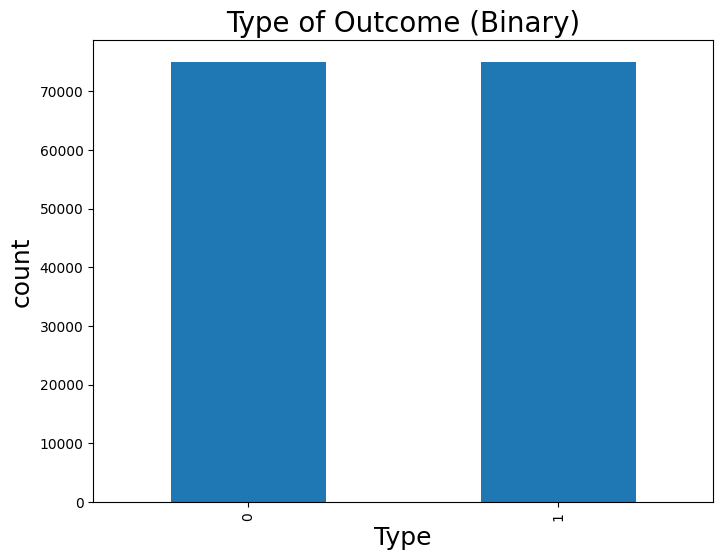

In [7]:
plt.figure(figsize = (8,6))
df['Outcome (Binary)'].value_counts().plot(kind = 'bar')
plt.title('Type of Outcome (Binary)', fontsize = 20)
plt.xlabel('Type', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.show()

In [8]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

correlation = numeric_data.corr()

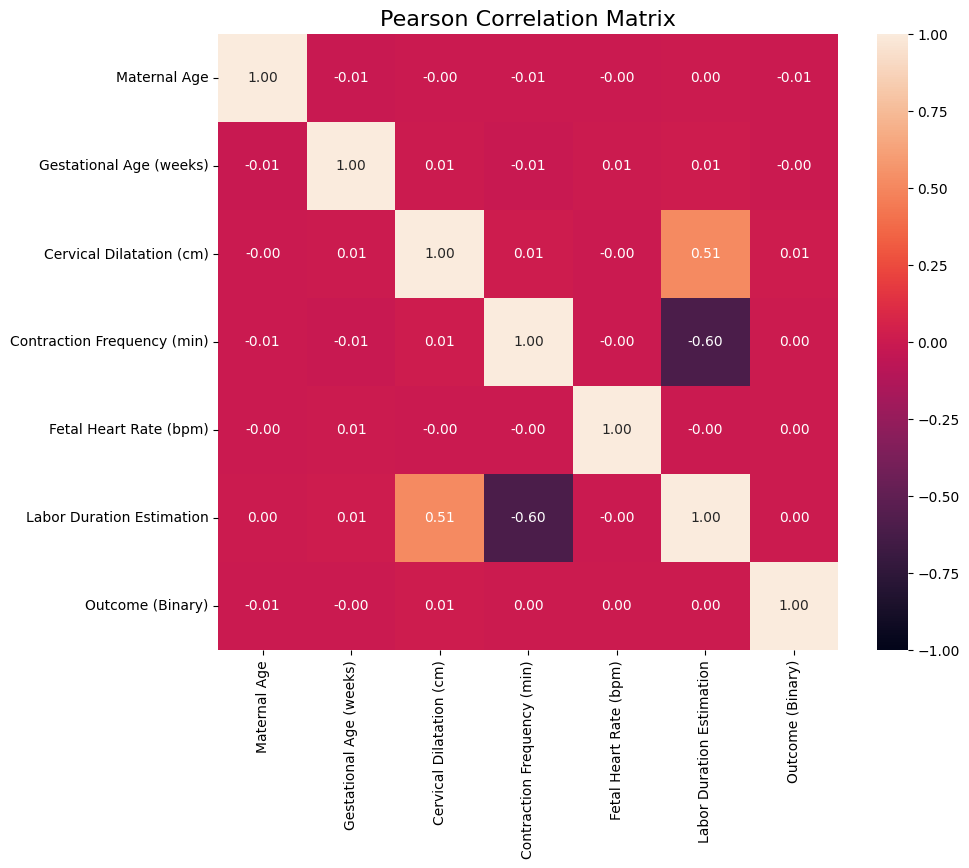

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.show()

In [10]:
print(f'Shape of Labor Dataset before drop duplicated Row is: {df.shape}')
print(f'Shape of Labor Dataset After Drop Duplicated Row is: {df.shape}')


Shape of Labor Dataset before drop duplicated Row is: (150000, 16)
Shape of Labor Dataset After Drop Duplicated Row is: (150000, 16)


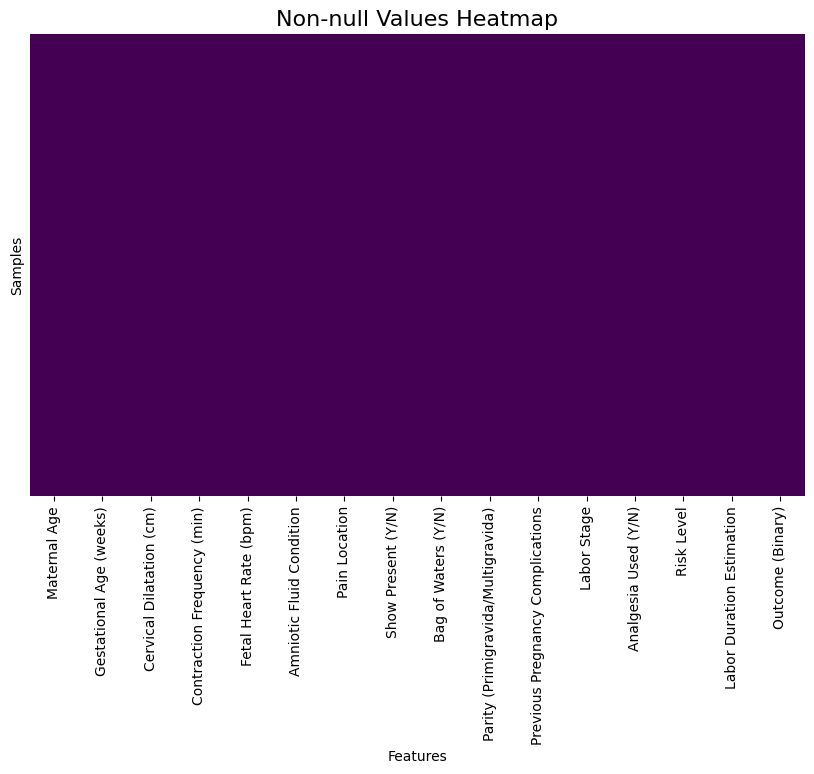

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.notnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Non-null Values Heatmap', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

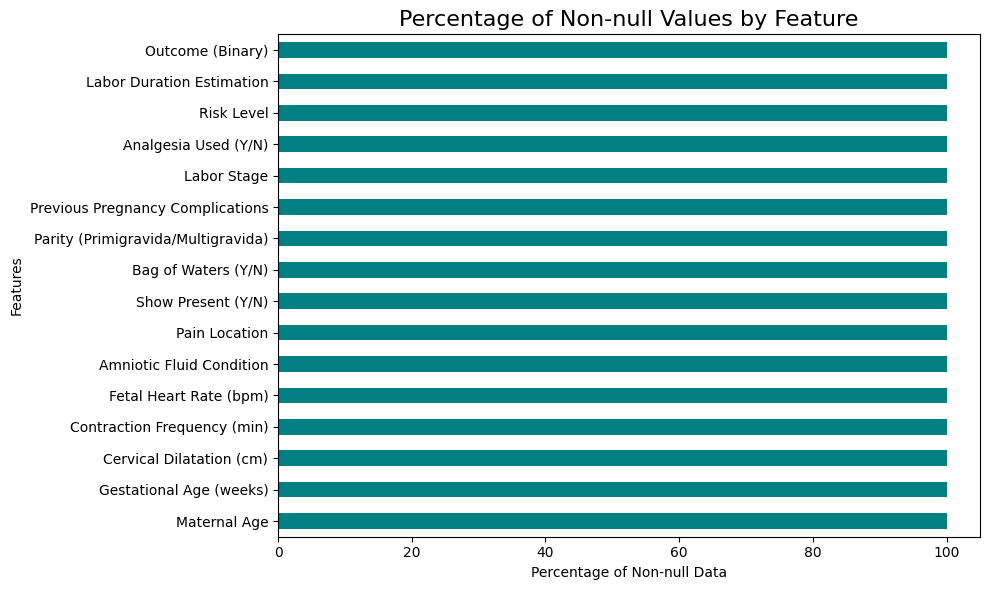

In [12]:
non_missing_data = df.notnull().mean() * 100

plt.figure(figsize=(10, 6))
non_missing_data.sort_values().plot(kind='barh', color='teal')
plt.title('Percentage of Non-null Values by Feature', fontsize=16)
plt.xlabel('Percentage of Non-null Data')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [13]:
missing=df.isnull().sum()
missing_Ratio=df.isnull().sum() /df.shape[0]
null_values=pd.concat([missing,missing_Ratio],axis=1,keys=['missing','missing_Ratio'])
null_values

,missing,missing_Ratio
Maternal Age,0,0.0
Gestational Age (weeks),0,0.0
Cervical Dilatation (cm),0,0.0
Contraction Frequency (min),0,0.0
Fetal Heart Rate (bpm),0,0.0
Amniotic Fluid Condition,0,0.0
Pain Location,0,0.0
Show Present (Y/N),0,0.0
Bag of Waters (Y/N),0,0.0
Parity (Primigravida/Multigravida),0,0.0


In [14]:
features_y_n=['Show Present (Y/N)'	,'Bag of Waters (Y/N)','Previous Pregnancy Complications',		'Analgesia Used (Y/N)']

In [15]:
def encoding_features(feat):
    if feat == 'Y':
        return 1
    elif feat == 'N':
        return 0

In [16]:
for item in features_y_n:
  df[item]=df[item].apply(encoding_features)

In [17]:
df['Contraction Frequency (min)'].unique()

array([17., 11.,  2.,  3., 15., 13.,  8., 12.,  4., 10., 18.,  5., 19.,
        7., 14.,  6., 16.,  9.])

In [18]:

def categorize_contraction_frequency(value):
    if value >= 10:
        return "Rare"
    elif 5 <= value < 10:
        return "Frequent"
    else:  # value < 5
        return "Very Frequent"

# Apply the function to the column
df['Contraction Frequency (min)'] = df['Contraction Frequency (min)'].apply(categorize_contraction_frequency)




In [19]:
df['Contraction Frequency (min)'].unique()

array(['Rare', 'Very Frequent', 'Frequent'], dtype=object)

In [20]:
df['Contraction Frequency (min)']

,Contraction Frequency (min)
0,Rare
1,Rare
2,Rare
3,Very Frequent
4,Very Frequent
...,...
149995,Rare
149996,Rare
149997,Very Frequent
149998,Frequent


In [21]:
df['Cervical Dilatation (cm)'].unique()

array([ 1. ,  7.2,  8.4,  7.8,  3.2,  7.5,  9.2,  3.8,  8.5,  4.3,  0.7,
        1.7,  0.9,  8.2,  7. ,  5.4,  6.5,  4.9,  0.2,  2.7,  5.9,  8.6,
        7.3,  9.9,  6.2,  2.2,  8.9,  0.5,  4.2,  7.1,  5.2,  2.4,  3.7,
        7.4,  2.9,  1.6,  4.6,  1.5,  2. ,  4.7,  6.7,  9.5,  6.3,  2.6,
        8.8,  3.9,  5.8,  0.4,  2.3,  6.9,  0.8,  9.8,  3.1,  6.1,  3.6,
        3. ,  9.7,  5.6,  7.6,  1.8,  5.7,  1.9,  5. ,  1.1,  6.4,  4.8,
        9.6,  6. ,  1.4,  2.8,  2.5,  9. ,  0.1,  5.3,  3.5,  4.4,  3.3,
        1.3,  7.7,  9.3,  6.6,  7.9,  4.5,  8.3,  0.6,  6.8,  3.4,  8.7,
        4.1, 10. ,  1.2,  5.1,  2.1,  4. ,  9.1,  8.1,  0.3,  9.4,  8. ,
        5.5,  0. ])

In [22]:

def categorize_dilatation(value):
    if value == 0:
        return "Closed"
    elif 0 < value < 4:
        return "Latent Phase"
    elif 4 <= value < 7:
        return "Active Phase"
    elif 7 <= value < 10:
        return "Transition Phase"
    elif value == 10:
        return "Fully Dilated"
    else:
        return "Unknown"


df['Cervical Dilatation (cm)'] = df['Cervical Dilatation (cm)'].apply(categorize_dilatation)




In [23]:
df['Cervical Dilatation (cm)'].unique()

array(['Latent Phase', 'Transition Phase', 'Active Phase',
       'Fully Dilated', 'Closed'], dtype=object)

In [24]:
df['Fetal Heart Rate (bpm)'].unique()


array([176., 118., 172., 121., 162., 129., 119., 138., 142., 178., 141.,
       169., 135., 139., 164., 144., 173., 143., 145., 113., 127., 136.,
       110., 153., 132., 120., 158., 157., 175., 150., 154., 147., 161.,
       166., 165., 159., 125., 148., 170., 177., 137., 115., 151., 163.,
       167., 155., 179., 156., 123., 116., 130., 168., 149., 112., 124.,
       174., 131., 126., 133., 140., 171., 128., 152., 134., 160., 122.,
       117., 146., 114., 111.])

In [25]:

def categorize_heart_rate(value):
    if value < 120:
        return "Bradycardia"  # بطء ضربات القلب
    elif 120 <= value <= 160:
        return "Normal"  # طبيعي
    elif value > 160:
        return "Tachycardia"  # تسارع ضربات القلب
    else:
        return "Unknown"

df['Fetal Heart Rate (bpm)'] = df['Fetal Heart Rate (bpm)'].apply(categorize_heart_rate)





In [26]:
df['Fetal Heart Rate (bpm)'].unique()

array(['Tachycardia', 'Bradycardia', 'Normal'], dtype=object)

In [27]:
df.isnull().sum()

,0
Maternal Age,0
Gestational Age (weeks),0
Cervical Dilatation (cm),0
Contraction Frequency (min),0
Fetal Heart Rate (bpm),0
Amniotic Fluid Condition,0
Pain Location,0
Show Present (Y/N),0
Bag of Waters (Y/N),0
Parity (Primigravida/Multigravida),0


In [28]:
df['Amniotic Fluid Condition'].unique()

array(['Blood-stained', 'Clear', 'Meconium-stained'], dtype=object)

In [29]:
df

,Maternal Age,Gestational Age (weeks),Cervical Dilatation (cm),Contraction Frequency (min),Fetal Heart Rate (bpm),Amniotic Fluid Condition,Pain Location,Show Present (Y/N),Bag of Waters (Y/N),Parity (Primigravida/Multigravida),Previous Pregnancy Complications,Labor Stage,Analgesia Used (Y/N),Risk Level,Labor Duration Estimation,Outcome (Binary)
0,35.0,29.0,Latent Phase,Rare,Tachycardia,Blood-stained,Groin,1,0,Primigravida,0,Second,1,High,0.058824,0
1,39.0,41.0,Transition Phase,Rare,Bradycardia,Clear,Groin,1,0,Primigravida,1,Fourth,0,High,0.476471,0
2,23.0,38.0,Transition Phase,Rare,Tachycardia,Clear,Groin,0,1,Primigravida,0,Third,1,Low,0.494118,1
3,26.0,38.0,Transition Phase,Very Frequent,Normal,Blood-stained,Abdomen,1,1,Multigravida,0,Third,0,Low,3.900000,1
4,34.0,31.0,Latent Phase,Very Frequent,Tachycardia,Blood-stained,Groin,1,0,Multigravida,0,Third,1,High,1.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,40.0,34.0,Latent Phase,Rare,Normal,Blood-stained,Groin,0,0,Multigravida,1,Second,1,High,0.093750,0
149996,34.0,30.0,Transition Phase,Rare,Normal,Blood-stained,Abdomen,0,0,Primigravida,1,First,0,High,0.494444,0
149997,39.0,39.0,Latent Phase,Very Frequent,Bradycardia,Blood-stained,Groin,0,0,Multigravida,0,Third,1,High,0.866667,0
149998,22.0,40.0,Latent Phase,Frequent,Normal,Meconium-stained,Groin,0,0,Multigravida,1,Second,0,High,0.320000,0


In [30]:
cervical_dilatation_map = {
        'Closed': 0, 'Latent Phase': 1, 'Active Phase': 2,
        'Transition Phase': 3, 'Fully Dilated': 4}

contraction_frequency_map = {
  'Rare': 0, 'Frequent': 1, 'Very Frequent': 2
}

fetal_heart_rate_map = {
  'Normal': 0, 'Tachycardia': 1, 'Bradycardia': 2
}

amniotic_map = {
  'Clear': 0, 'Blood-stained': 1, 'Meconium-stained': 2
}

labor_stage_map = {
  'First': 1, 'Second': 2, 'Third': 3, 'Fourth': 4
}

pain_location_map = {
  'Groin': 1, 'Abdomen': 2
}


df['Cervical Dilatation (cm)'] = df['Cervical Dilatation (cm)'].map(cervical_dilatation_map)
df['Contraction Frequency (min)'] = df['Contraction Frequency (min)'].map(contraction_frequency_map)
df['Fetal Heart Rate (bpm)'] = df['Fetal Heart Rate (bpm)'].map(fetal_heart_rate_map)
df['Amniotic Fluid Condition'] = df['Amniotic Fluid Condition'].map(amniotic_map)
df['Labor Stage'] = df['Labor Stage'].map(labor_stage_map)
df['Pain Location'] = df['Pain Location'].map(pain_location_map)


In [31]:

df['Parity (Primigravida/Multigravida)'] = np.where(
    df['Parity (Primigravida/Multigravida)'] == 'Primigravida', 1, 0
)


df['Risk Level'] = np.where(df['Risk Level'] == 'High', 1, 0)


In [32]:
df.dtypes

,0
Maternal Age,float64
Gestational Age (weeks),float64
Cervical Dilatation (cm),int64
Contraction Frequency (min),int64
Fetal Heart Rate (bpm),int64
Amniotic Fluid Condition,int64
Pain Location,int64
Show Present (Y/N),int64
Bag of Waters (Y/N),int64
Parity (Primigravida/Multigravida),int64


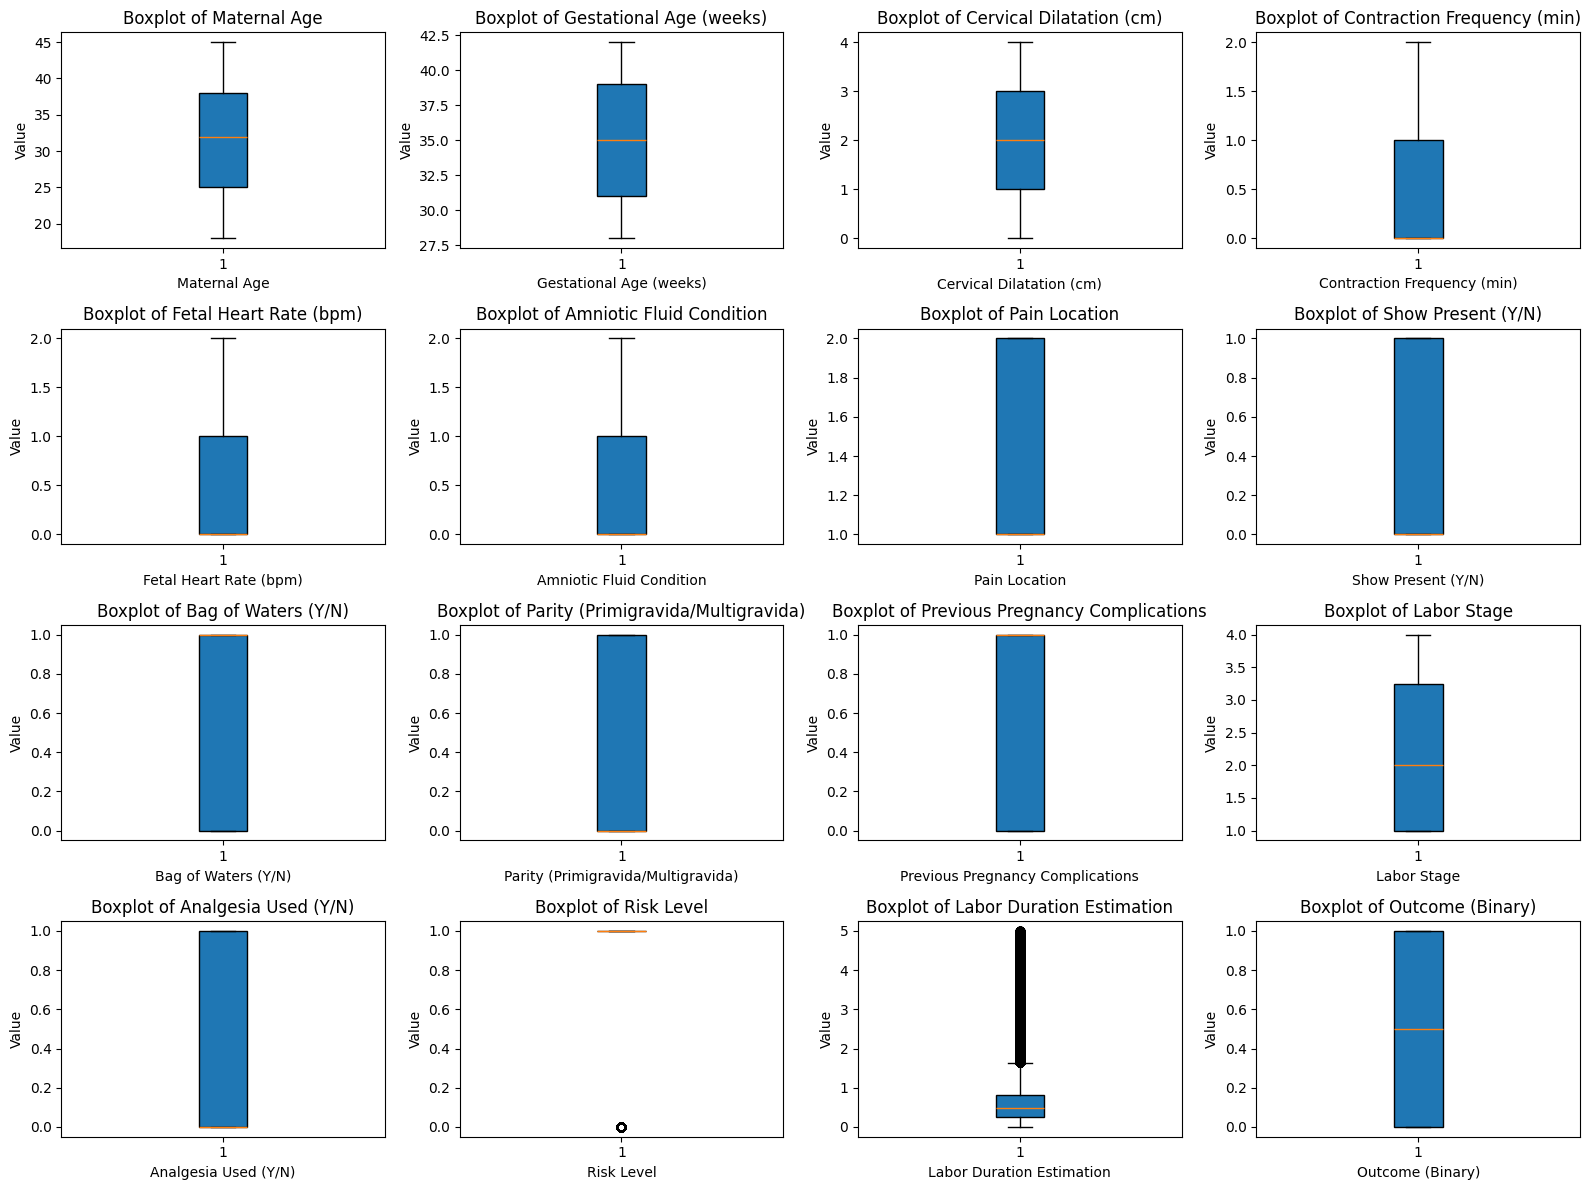

In [33]:
col_outliers = df.columns

# Generate boxplots for numeric columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
axes = axes.flatten()

for count, col in enumerate(col_outliers):
    axes[count].boxplot(df[col].dropna(), patch_artist=True)
    axes[count].set_title(f'Boxplot of {col}')
    axes[count].set_xlabel(col)
    axes[count].set_ylabel('Value')

# Remove extra subplots
for i in range(len(col_outliers), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [34]:
df['Outcome (Binary)'].value_counts()

,count
Outcome (Binary),
0,75000
1,75000


In [35]:
X = df.drop(columns=['Outcome (Binary)'])
y = df['Outcome (Binary)']


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:

rf_model = RandomForestClassifier()


print("Training Random Forest...")
rf_model.fit(X_train, y_train)




Training Random Forest...


RandomForestClassifier()

Accuracy of Random Forest: 99.45%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14889
           1       0.99      1.00      0.99     15111

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



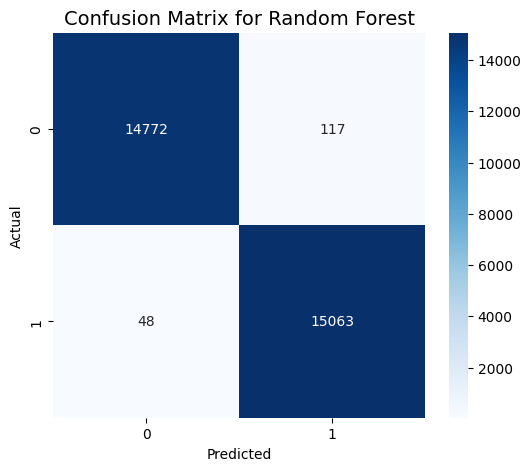

In [43]:
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy * 100:.2f}%")


report = classification_report(y_test, y_pred)
print(f"Classification Report for Random Forest:\n{report}\n" + "="*50)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for Random Forest", fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pickle


In [ ]:
with open("model_rf_final.pkl", "wb") as f:
    pickle.dump(model, f)